In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, e

### 1-D binary classification by Gaussian distribution

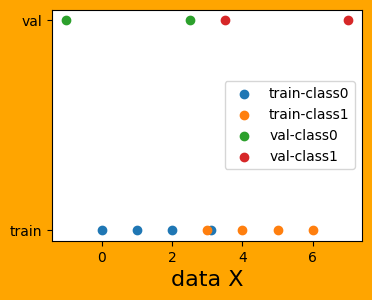

In [73]:
# step 1: get data
X     = np.array([0, 1, 2, 3, 3.1, 4, 5, 6] + [-1, 2.5, 3.5, 7])
yTrue = np.array([0, 0, 0, 1, 0,   1, 1, 1] + [ 0,   0,   1, 1])

# step 2: split to train, val
XTrain     = X[:8]
yTrueTrain = yTrue[:8]
XVal       = X[8:]
yTrueVal   = yTrue[8:]

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.scatter( XTrain[yTrueTrain==0], ["train"]*(yTrueTrain==0).sum() ) # train - class 0
plt.scatter( XTrain[yTrueTrain==1], ["train"]*(yTrueTrain==1).sum() ) # train - class 1
plt.scatter( XVal  [yTrueVal  ==0], ["val"  ]*(yTrueVal  ==0).sum() ) # val - class 0
plt.scatter( XVal  [yTrueVal  ==1], ["val"  ]*(yTrueVal  ==1).sum() ) # val - class 1
plt.legend(labels=["train-class0","train-class1","val-class0","val-class1"])
plt.xlabel("data X", fontsize=16)
plt.show()

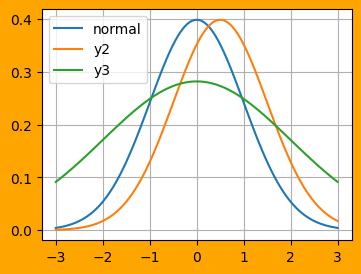

In [74]:
# step 3: create model
# step 4: define loss function L
# step 5: find best mu,si to minimize L

# after some mathematical derivation, the result is equivalent to:
# G0 based on class0 - mu = mean(XTrain where yTrain==0), sig = std(XTrain where yTrain==0)
# G1 based on class1 - mu = mean(XTrain where yTrain==1), sig = std(XTrain where yTrain==1)
# if model0.predict(y) > model1.predict(y): class 0
# else model0.predict(y) < model1.predict(y): class 1

def Gauss(x, mu, si):
    return 1/(2*pi*si)**0.5 * e**(-0.5*(x-mu)**2/si**2)

Xi = np.linspace(-3,3,100)
y1 = Gauss(Xi,   0, 1)
y2 = Gauss(Xi, 0.5, 1)
y3 = Gauss(Xi, 0  , 2)

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.plot(Xi, y1)
plt.plot(Xi, y2)
plt.plot(Xi, y3)
plt.legend(labels=["normal","y2","y3"])
plt.grid('on')
plt.show()

In [75]:
class Model:
    def __init__(self, mu0, si0, mu1, si1):
        self.mu0, self.si0, self.mu1, self.si1 = mu0, si0, mu1, si1
    def predict(self, x):
        return Gauss(x, self.mu0, self.si0) - Gauss(x, self.mu1, self.si1)

XTrainC0 = XTrain[yTrueTrain==0]
XTrainC1 = XTrain[yTrueTrain==1]

mu0 = XTrainC0.mean() # 1.525
si0 = XTrainC0.std() # 1.15
mu1 = XTrainC1.mean() # 4.5
si1 = XTrainC1.std() # 1.118

model = Model(mu0, si0, mu1, si1) # complete model

In [76]:
# step 6
yPredValScore = model.predict(XVal)
print( "yPredValScore:", yPredValScore )
yPredVal = np.array([ 0 if score>0 else 1 for score in yPredValScore ])
print( "yPredVal:", yPredVal )
print( "yTrueVal:", yTrueVal )

accuracy = (yPredVal==yTrueVal).sum() / len(yTrueVal)
print( "accuracy:", accuracy )

yPredValScore: [ 0.03363446  0.1836196  -0.16743153 -0.03096575]
yPredVal: [0 0 1 1]
yTrueVal: [0 0 1 1]
accuracy: 1.0


In [77]:
# binary classification: 4 result
# Pred class 0, GT class 0 -> correct C[0][0]
# Pred class 0; GT class 1 -> error   C[0][1]
# Pred class 1; GT class 0 -> error   C[1][0]
# Pred class 1; GT class 1 -> correct C[1][1]
# confusion matrix

C = np.zeros( (2,2) )
for yPred,yTrue in zip(yPredVal, yTrueVal):
    C[yPred][yTrue]+=1
print("Confusion matrix:\n", C)

Confusion matrix:
 [[2. 0.]
 [0. 2.]]


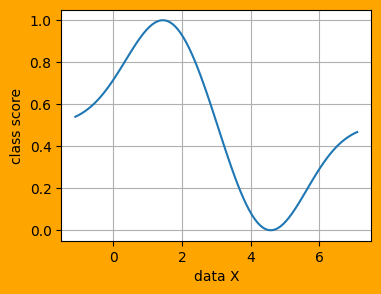

In [82]:
Xi = np.linspace( X.min()-0.1, X.max()+0.1, 100 )
yi = model.predict(Xi)
yi = (yi-yi.min())/(yi.max()-yi.min()) # normalize

fig = plt.figure(figsize=(4,3))
fig.set_facecolor("orange")
plt.plot(Xi,yi)
plt.grid('on')
plt.xlabel('data X')
plt.ylabel('class score')
plt.show()

In [89]:
Xi[ np.abs(yi-0.5).argmin() ] # border

3.041414141414141

### 2-D ternary classification by Gaussian distribution

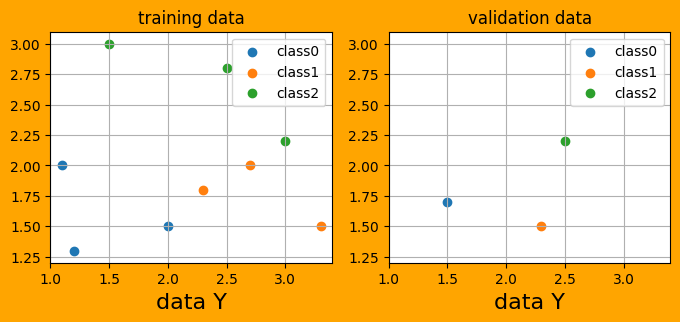

In [140]:
# step 1: get data
X     = np.array([ [1.1,2.0], [2.0,1.5], [1.2,1.3], [1.5,1.7], \
                   [2.3,1.8], [3.3,1.5], [2.7,2.0], [2.3,1.5], \
                   [1.5,3.0], [2.5,2.8], [3.0,2.2], [2.5,2.2], \
                 ])
yTrue = np.array([0,0,0,0, 1,1,1,1, 2,2,2,2])

# step 2: split to train, val
XTrain     = X    [ [0,1,2,4,5,6,8,9,10] ]
yTrueTrain = yTrue[ [0,1,2,4,5,6,8,9,10] ]
XVal       = X    [ [3,7,11] ]
yTrueVal   = yTrue[ [3,7,11] ]

fig = plt.figure(figsize=(8,3))
fig.set_facecolor("orange")

plt.subplot(1,2,1)
plt.title("training data")
plt.scatter( XTrain[yTrueTrain==0][:,0], XTrain[yTrueTrain==0][:,1] ) # train - class 0
plt.scatter( XTrain[yTrueTrain==1][:,0], XTrain[yTrueTrain==1][:,1] ) # train - class 1
plt.scatter( XTrain[yTrueTrain==2][:,0], XTrain[yTrueTrain==2][:,1] ) # train - class 2
plt.legend(labels=["class0","class1","class2"])
plt.xlabel("data X", fontsize=16)
plt.xlabel("data Y", fontsize=16)
plt.xlim( X[:,0].min()-0.1, X[:,0].max()+0.1 )
plt.ylim( X[:,1].min()-0.1, X[:,1].max()+0.1 )
plt.grid('on')

plt.subplot(1,2,2)
plt.title("validation data")
plt.scatter( XVal[yTrueVal==0][:,0], XVal[yTrueVal==0][:,1] ) # val - class 0
plt.scatter( XVal[yTrueVal==1][:,0], XVal[yTrueVal==1][:,1] ) # val - class 1
plt.scatter( XVal[yTrueVal==2][:,0], XVal[yTrueVal==2][:,1] ) # val - class 2
plt.legend(labels=["class0","class1","class2"])
plt.xlabel("data X", fontsize=16)
plt.xlabel("data Y", fontsize=16)
plt.grid('on')
plt.xlim( X[:,0].min()-0.1, X[:,0].max()+0.1 )
plt.ylim( X[:,1].min()-0.1, X[:,1].max()+0.1 )
plt.show()

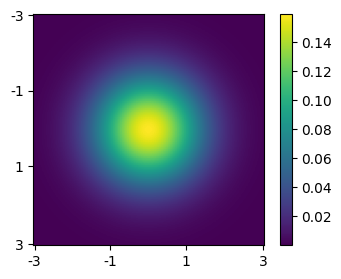

In [104]:
# https://en.wikipedia.org/wiki/Multivariate_normal_distribution
def Gauss(x, y, mux, muy, six, siy, lo):
    coefficient = 1/(2*pi*six*siy*(1-lo**2)**0.5)
    exponent    = -0.5/(1-lo**2) * ( ((x-mux)/six)**2 - 2*lo*(x-mux)/six*(y-muy)/siy + ((y-muy)/siy)**2 )
    return coefficient * e**exponent

Z = np.zeros( (101,101) )
for i,x in enumerate(np.linspace(-3, 3, 101)):
    for j,y in enumerate(np.linspace(-3, 3, 101)):
        Z[i][j] = Gauss(x,y,0,0,1,1,0)

plt.figure(figsize=(4,3))
plt.xticks([0,33,66,100], [-3,-1,1,3])
plt.yticks([0,33,66,100], [-3,-1,1,3])
plt.imshow(Z)
plt.colorbar()
plt.show()

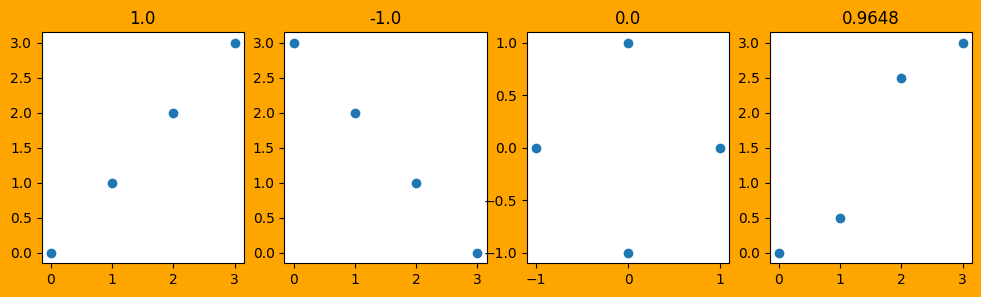

In [105]:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
def PearsonCorrelation(X, Y):
    mux, muy = X.mean(), Y.mean()
    cov = sum([ (x-mux)*(y-muy) for x,y in zip(X,Y) ]) / len(X)
    return round( cov/(X.std()*Y.std()), 4)

test1 = np.array([[0,0], [1,1], [2,2], [3,3]])
test2 = np.array([[0,3], [1,2], [2,1], [3,0]])
test3 = np.array([[0,1], [1,0], [0,-1], [-1,0]])
test4 = np.array([[0,0], [1,0.5], [2,2.5], [3,3]])

lo1 = PearsonCorrelation(test1[:,0], test1[:,1])
lo2 = PearsonCorrelation(test2[:,0], test2[:,1])
lo3 = PearsonCorrelation(test3[:,0], test3[:,1])
lo4 = PearsonCorrelation(test4[:,0], test4[:,1])

fig = plt.figure(figsize=(3*4,3))
fig.set_facecolor("orange")
plt.subplot(1,4,1)
plt.title(lo1)
plt.scatter( test1[:,0], test1[:,1] )
plt.subplot(1,4,2)
plt.title(lo2)
plt.scatter( test2[:,0], test2[:,1] )
plt.subplot(1,4,3)
plt.title(lo3)
plt.scatter( test3[:,0], test3[:,1] )
plt.subplot(1,4,4)
plt.title(lo4)
plt.scatter( test4[:,0], test4[:,1] )
plt.show()

In [146]:
# step 3: create model
# step 4: define loss function L
# step 5: find best mu,si to minimize L

# after some mathematical derivation, the result is equivalent to:
#    max( G0(x,y,mux0,muy0,six0,siy0,lo0), G1(x,y,mux1,muy1,six1,siy1,lo1), G2(x,y,mux2,muy2,six2,siy2,lo2) )
# or max( G0(x,y,mux0,muy0,ssix,ssiy,slo), G1(x,y,mux1,muy1,ssix,ssiy,slo), G2(x,y,mux2,muy2,ssix,ssiy,slo) )

class ModelIndependent:
    def __init__(self, mux0, muy0, six0, siy0, lo0, mux1, muy1, six1, siy1, lo1, mux2, muy2, six2, siy2, lo2):
        self.mux0, self.muy0, self.six0, self.siy0, self.lo0 = mux0, muy0, six0, siy0, lo0
        self.mux1, self.muy1, self.six1, self.siy1, self.lo1 = mux1, muy1, six1, siy1, lo1
        self.mux2, self.muy2, self.six2, self.siy2, self.lo2 = mux2, muy2, six2, siy2, lo2
    def predict(self, x, y):
        score0 = Gauss(x, y, self.mux0, self.muy0, self.six0, self.siy0, self.lo0)
        score1 = Gauss(x, y, self.mux1, self.muy1, self.six1, self.siy1, self.lo1)
        score2 = Gauss(x, y, self.mux2, self.muy2, self.six2, self.siy2, self.lo2)        
        if type(x)==type(np.array):
            score  = np.stack([ score0, score1, score2 ]) # row: data; col: class-i score
            score[0,:] = score[0,:] / score[0,:].sum()
            score[1,:] = score[1,:] / score[1,:].sum()
            score[2,:] = score[2,:] / score[2,:].sum()
            return np.round( score, 3 )
        else:
            return score0, score1, score2
        
# class ModelShare:
#     def __init__(self, mu0, mu1, mu2, ssix, ssiy, slo):
#         self.mu0, self.mu1, self.mu2, self.csix, self.csiy, self.clo = mu0, mu1, mu2, csix, csiy, clo
#     def predict(self, x):
#         score0, score1, score2 = Gauss(x, self.mu0, self.si0), Gauss(x, self.mu1, self.si1), Gauss(x, self.mu2, self.si2)
#         return 

XTrainC0 = XTrain[yTrueTrain==0]
XTrainC1 = XTrain[yTrueTrain==1]
XTrainC2 = XTrain[yTrueTrain==2]

mux0, muy0, six0, siy0 = XTrainC0[:,0].mean(), XTrainC0[:,1].mean(), XTrainC0[:,0].std(), XTrainC0[:,1].std()
mux1, muy1, six1, siy1 = XTrainC1[:,0].mean(), XTrainC1[:,1].mean(), XTrainC1[:,0].std(), XTrainC1[:,1].std()
mux2, muy2, six2, siy2 = XTrainC2[:,0].mean(), XTrainC2[:,1].mean(), XTrainC2[:,0].std(), XTrainC2[:,1].std()
lo0 = PearsonCorrelation(XTrainC0[:,0], XTrainC0[:,1])
lo1 = PearsonCorrelation(XTrainC1[:,0], XTrainC1[:,1])
lo2 = PearsonCorrelation(XTrainC2[:,0], XTrainC2[:,1])

model = ModelIndependent(mux0, muy0, six0, siy0, lo0, mux1, muy1, six1, siy1, lo1, mux2, muy2, six2, siy2, lo2)

In [147]:
# step 6
yPredValScore = model.predict( XVal[:,0], XVal[:,1] )
print( "yPredValScore:\n", yPredScore )
yPredVal = yPredScore.argmax(axis=1)
print( "yPredVal:", yPredVal )
print( "yTrueVal:", yTrueVal )

accuracy = (yPredVal==yTrueVal).sum() / len(yTrueVal)
print( "accuracy:", accuracy )

yPredValScore:
 [[0.908 0.091 0.   ]
 [0.    0.133 0.867]
 [0.    0.    1.   ]]
yPredVal: [0 2 2]
yTrueVal: [0 1 2]
accuracy: 0.6666666666666666


In [148]:
C = np.zeros( (3,3) )
for yPred,yTrue in zip(yPredVal, yTrueVal):
    C[yPred][yTrue]+=1
print("Confusion matrix:\n", C)

Confusion matrix:
 [[1. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]]


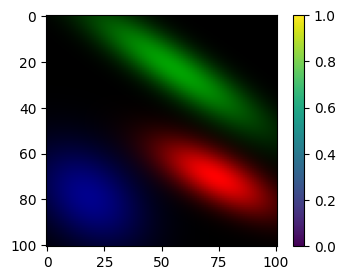

In [167]:
Z = np.zeros( (101,101,3) )
# matrix (i,j) w.r.t. coordinate(x,y): i is -y, j is x
for i,y in enumerate( np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 101) ):
    for j,x in enumerate( np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 101) ):
        Z[-1-i][j] = model.predict(x,y)
Z = (Z-Z.min())/(Z.max()-Z.min())
# dot    : class0,class1,class2 = blue,orange,green
# channel: class0,class1,class2 = R,G,B
Z = Z[:,:,[1,2,0]]

plt.figure(figsize=(4,3))
plt.imshow( Z )
plt.colorbar()
plt.show()